In [1]:
import pandas as pd
import numpy as np
import json
import sys
from yahoo_oauth import OAuth2
from json import dumps
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%matplotlib inline

'email.message', 'http.client', 'urllib.response', 'urllib.error', 'nturl2path', 'urllib.request', 'IPython.core.magics.code', 'IPython.core.magics.config', 'IPython.core.magics.display', 'timeit', '_lsprof', 'profile', 'cProfile', 'pstats', 'IPython.utils.module_paths', 'IPython.utils.timing', 'IPython.core.magics.execution', 'IPython.core.magics.extension', 'IPython.core.magics.history', 'IPython.core.magics.logging', 'IPython.core.magics.namespace', 'IPython.core.magics.osm', 'IPython.core.magics.packaging', 'IPython.core.pylabtools', 'IPython.core.magics.pylab', 'IPython.lib.backgroundjobs', 'IPython.core.magics.script', 'IPython.core.magics', 'IPython.core.shellapp', 'IPython.extensions', 'IPython.extensions.storemagic', 'IPython.terminal.ipapp', 'IPython.terminal.embed', 'IPython.utils.frame', 'IPython', 'jupyter_client._version', 'zmq.libzmq', 'zmq.backend.select', 'cython_runtime', 'zmq.backend.cython.constants', '_cython_0_29_21', 'zmq.backend.cython.error', 'zmq.error', 'zmq.

In [2]:
# import dictionary of Yahoo Manager Names to Real Life Nicknames
with open('../teams/team_mapping_initials.txt', 'r') as f:
    dict_init = dict(eval(f.read()))
with open('../teams/team_mapping_full.txt', 'r') as f:
    dict_full = dict(eval(f.read()))
    
#Need to create mapping between Real Name and Initials, in form of new dictionary
dict_full_init = {}
for name in dict_full:
    dict_full_init[dict_full[name]] = dict_init[name]
    
# names--> manager initials
names = ['Ross', 'Jake', 'eli', 'Aaron', 'Michael', 'Matthew', 'Jacob', 'jordan', 'Jordan Jay', 'JJ Swerve', 'Zach', 'Zac Neff']

weeks = ['wk_1', 'wk_2', 'wk_3', 'wk_4', 'wk_5', 'wk_6', 'wk_7', 'wk_8',
         'wk_9', 'wk_10', 'wk_11', 'wk_12', 'wk_13', 'wk_14', 'wk_15', 'wk_16']
print("done")

done


In [3]:
week = 1
df_total_scores = pd.DataFrame()
df_total_scores = pd.DataFrame(columns=weeks, index = names)
for week in range(1,17):
    df_scores = pd.read_csv('./weekly_scores/wk_'+str(week)+'_scores.csv', index_col='Unnamed: 0')
    df_scores = df_scores.rename(columns=dict_full_init)
    
    week_id = 'wk_' + str(week)
    #df_total_scores[week_id] = pd.Series()
    positions = ['QB', 'WR1', 'WR2', 'RB1', 'RB2', 'TE', 'W/R/T','K', 'DEF']
    for manager in df_scores:
        df_total_scores.loc[manager, week_id] = df_scores.loc[positions, manager].sum()


In [4]:
#df_total_scores = df_total_scores.reset_index()
df_total_scores.replace(0, np.nan, inplace=True)
df_total_scores

,wk_1,wk_2,wk_3,wk_4,wk_5,wk_6,wk_7,wk_8,wk_9,wk_10,wk_11,wk_12,wk_13,wk_14,wk_15,wk_16
Ross,103.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jake,122.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eli,150.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron,131.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Michael,132.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Matthew,115.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jacob,101.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jordan,149.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jordan Jay,130.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JJ Swerve,96.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 (courbd.ttf) normal normal 700 normal>) = 10.335
[2020-09-15 15:49:10,088 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
[2020-09-15 15:49:10,088 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
[2020-09-15 15:49:10,091 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
[2020-09-15 15:49:10,091 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
[2020-09-15 15:49:10,094 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
[2020-09-15 15:49:10,094 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findf

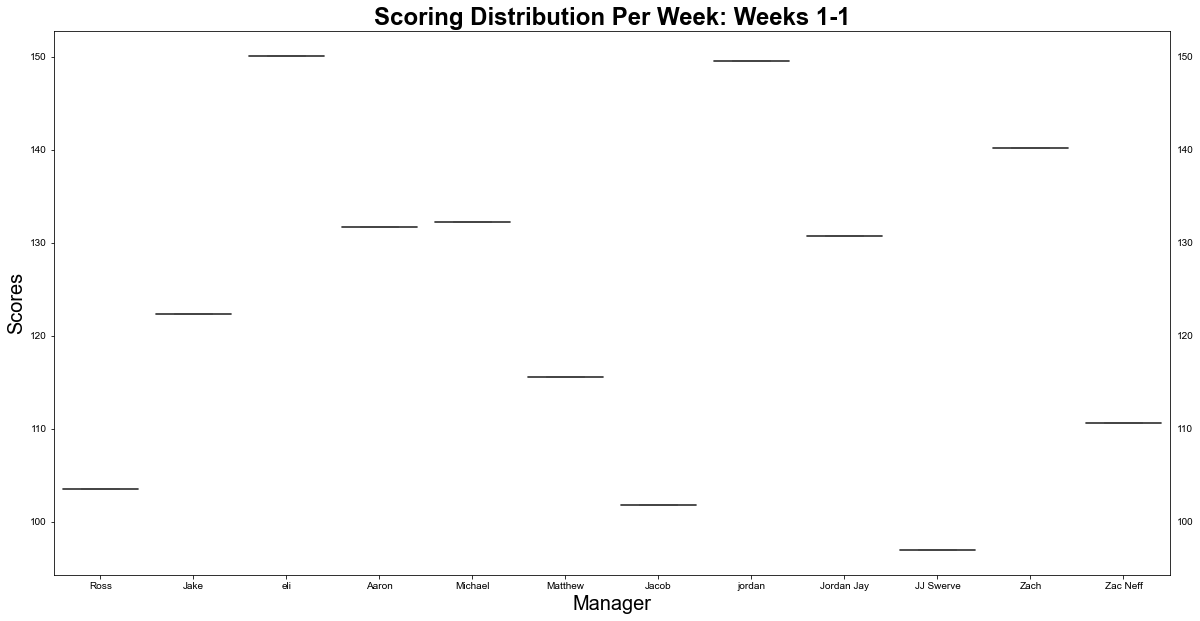

In [6]:
order = ['Ross', 'Jake', 'eli', 'Aaron', 'Michael', 'Matthew', 'Jacob', 'jordan', 'Jordan Jay', 'JJ Swerve', 'Zach', 'Zac Neff']
###################
week = 1
##################

fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.boxplot(data=data, 
                    order=order,
                    fliersize=10
                   )
ax.set_title("Scoring Distribution Per Week: Weeks 1-%s" % (week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.show(fig)


 (courbd.ttf) normal normal 700 normal>) = 10.335
[2020-09-15 15:50:32,901 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
[2020-09-15 15:50:32,901 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
[2020-09-15 15:50:32,904 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
[2020-09-15 15:50:32,904 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
[2020-09-15 15:50:32,908 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
[2020-09-15 15:50:32,908 DEBUG] [matplotlib.font_manager.font_manager._findfont_cached] findf

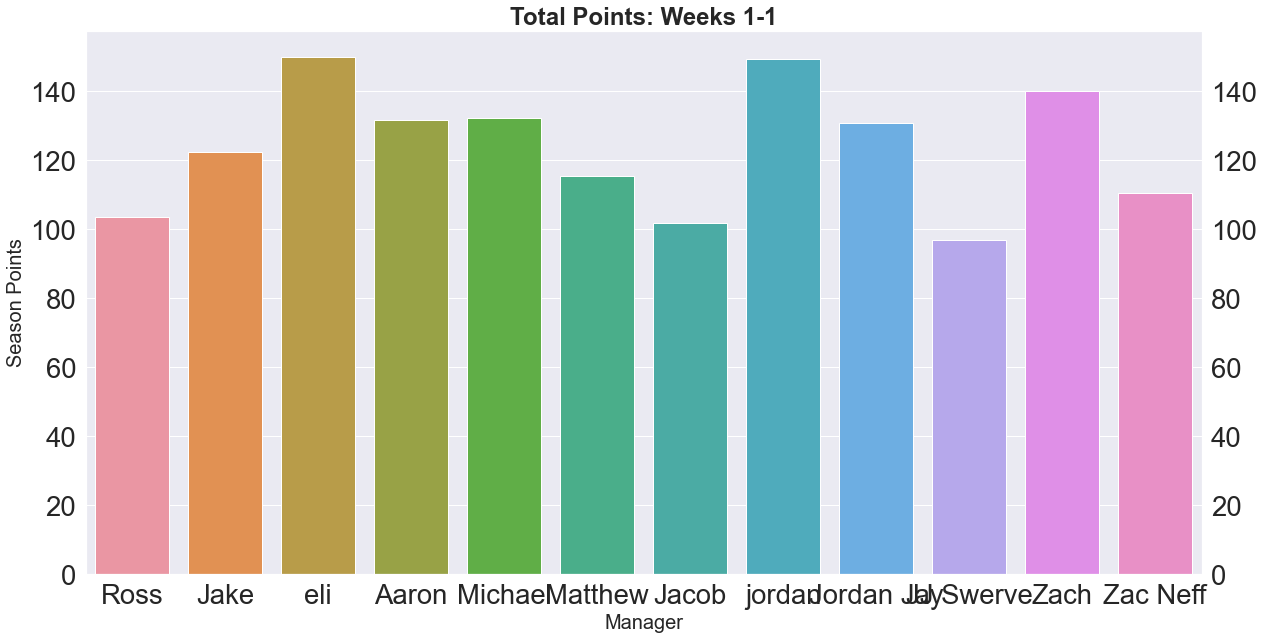

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.barplot(data=data, 
                    order=order,
                    estimator=sum,
                    ci=None
                   )
ax.set_title("Total Points: Weeks 1-%s" %(week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Season Points", fontsize=20)
plt.show(fig)

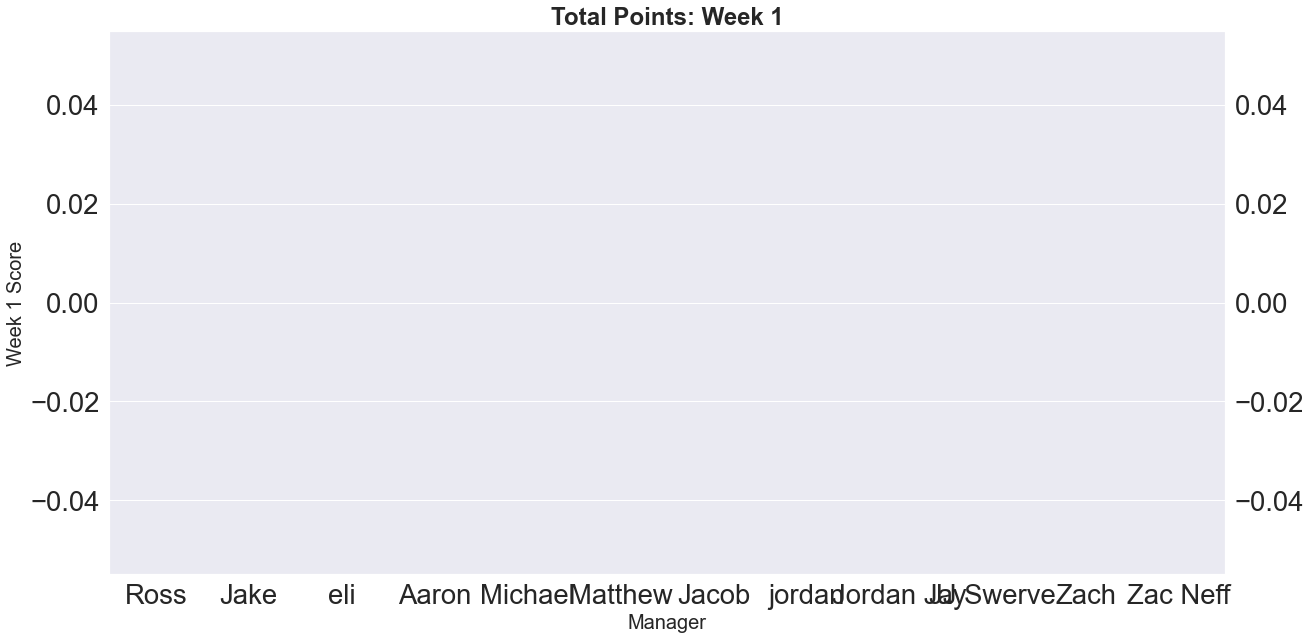

In [8]:


fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.reset_index()
graph = sns.barplot(data=data, 
                    order=order,
                    #estimator=sum,
                    y='wk_3',
                    x='index',
                    ci=None,
                    orient='v'
                   )
ax.set_title("Total Points: Week %s" %(week),
             fontsize = 24, 
             fontweight="bold")
data = df_total_scores.T

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Week %s Score" %(week), fontsize=20)
plt.show(fig)